In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../Datasets/winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
missing_values = data.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
# Adding three new columns
data['TotalAcidity'] = data['fixed acidity'] + data['volatile acidity']
data['Density_pH'] = data['density'] * data['pH']
data['Sulphates_Chlorides'] = data['sulphates'] / data['chlorides']

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,TotalAcidity,Density_pH,Sulphates_Chlorides
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10,3.502278,7.368421
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,8.68,3.189760,6.938776
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,8.56,3.250220,7.065217
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11.48,3.153680,7.733333
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10,3.502278,7.368421


### Using Scalar

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'TotalAcidity', 'Density_pH', 'Sulphates_Chlorides']

In [9]:
scaler = StandardScaler()

In [10]:
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [11]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,TotalAcidity,Density_pH,Sulphates_Chlorides
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,-0.438774,1.331060,-0.316596
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5,-0.098301,-0.727877,-0.457225
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5,-0.168744,-0.329553,-0.415839
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6,1.545360,-0.965580,-0.197155
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,-0.438774,1.331060,-0.316596


In [12]:
x = data.drop(columns = ['quality'])
y = data['quality']

In [13]:
x.shape

(1599, 14)

In [14]:
y.shape

(1599,)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Karan\AppData\Local\Temp\ipykernel_12388\2524165267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'quality', data = data, palette = 'viridis')


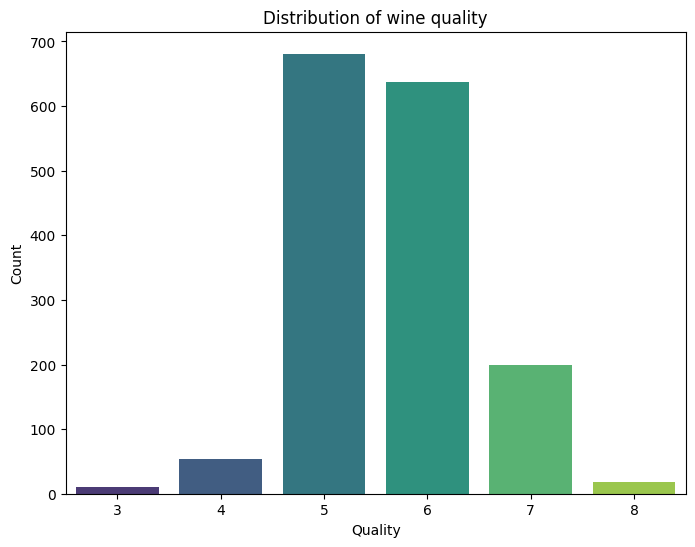

In [16]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'quality', data = data, palette = 'viridis')
plt.title("Distribution of wine quality")
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

### Feature importance using Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [18]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [19]:
model.fit(x,y)

RandomForestClassifier(random_state=0)

In [20]:
importance = model.feature_importances_

In [21]:
indices = np.argsort (importance)[::-1]

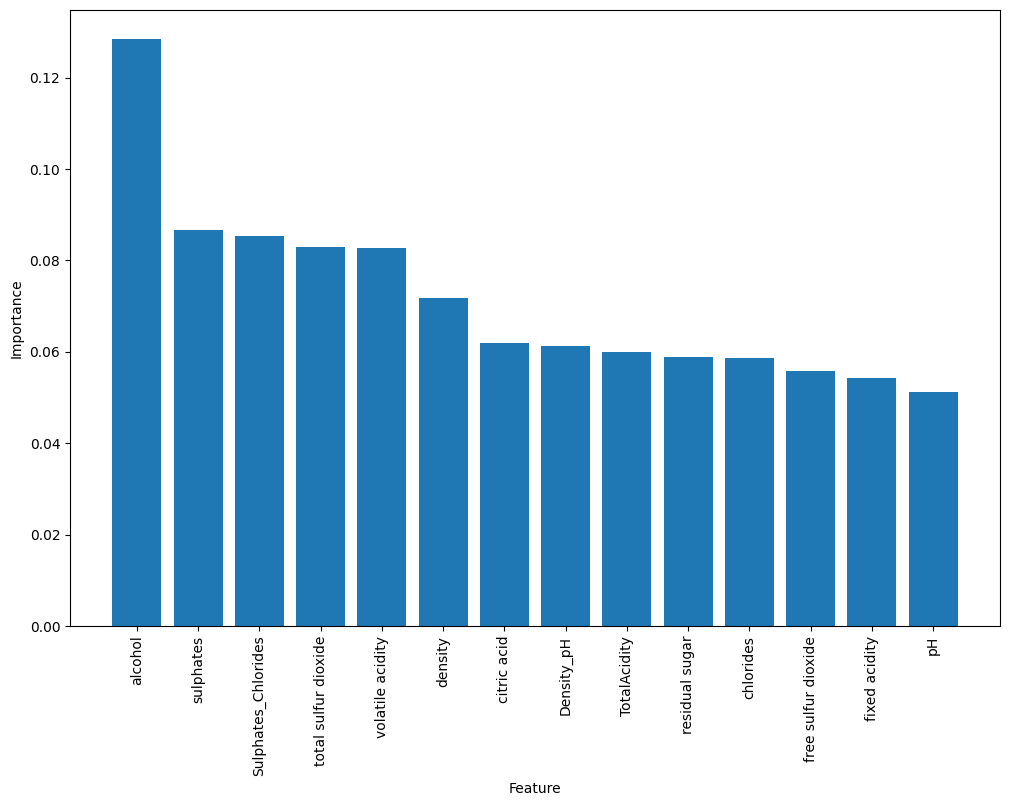

In [22]:
# Plot
plt.figure(figsize = (12, 8))
plt.bar(range(x.shape[1]), importance[indices], align = 'center')
plt.xticks(range(x.shape[1]), [numerical_features[i] for i in indices], rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [36]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [37]:
y_pred = model.predict(x_test)

In [38]:
print("Confusion Matrix =")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix =
[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 99 30  1  0]
 [ 0  0 32 92  7  1]
 [ 0  0  0 21 21  0]
 [ 0  0  0  2  3  0]]


In [39]:
print("Classification Report =")
print(classification_report(y_test, y_pred))

Classification Report =
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.76      0.74       130
           6       0.62      0.70      0.66       132
           7       0.66      0.50      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



C:\Users\Karan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Karan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Karan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [41]:
print("Accuracy =", accuracy_score(y_test, y_pred))
# More Accuracy from Decision Tree (here Random Forest is used)

Accuracy = 0.6625


### Using PCA

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA()

In [44]:
pca.fit(data[numerical_features])

PCA()

In [45]:
pca_data = pca.transform(data[numerical_features])

In [46]:
pca_df = pd.DataFrame(data = pca_data, columns = [f'PC{i+1}' for i in range(pca_data.shape[1])])

In [49]:
explained_varaince = pca.explained_variance_ratio_
print(explained_varaince)

[3.23573322e-01 1.58052149e-01 1.28905710e-01 9.22461663e-02
 7.77325269e-02 6.81709683e-02 5.36158375e-02 4.47250625e-02
 2.55354615e-02 1.44253009e-02 7.88215386e-03 5.13515957e-03
 1.81707429e-07 2.74150141e-17]


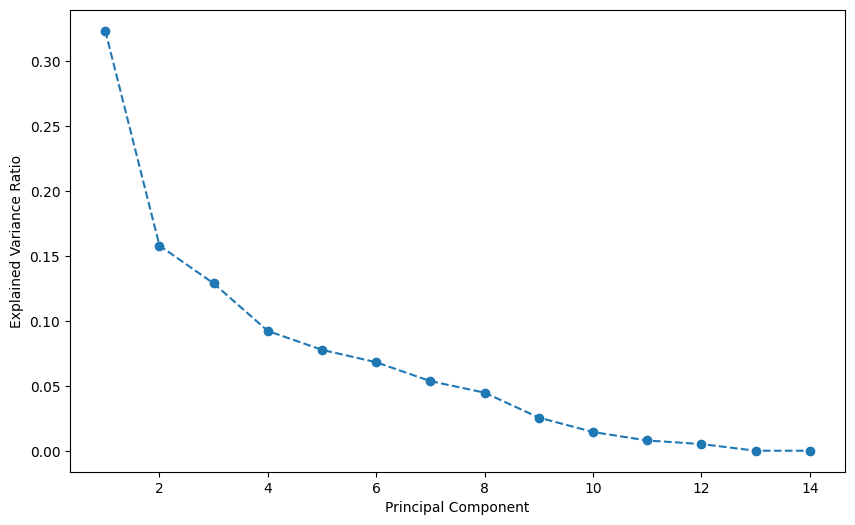

In [51]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, len(explained_varaince) + 1), explained_varaince, marker = 'o', linestyle = '--')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()